## Muka-Statistik

* https://datahub.io/biblioteka-archiw/datenmuka#pandas

In [1]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/biblioteka-archiw/datenmuka/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

In [2]:
package

In [3]:
# to load only tabular data
resources = package.resources

In [4]:
resources

In [5]:
resource = resources[0]

In [6]:
resource

In [7]:
# The resource is zipped. So let's use another way.

In [8]:
df = pd.read_excel("../data/statistik_muka.xlsx")

In [9]:
df.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.64151,97.3585
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.5642,18.4358
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.262,18.738
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.8764,1.1236
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.7931,11.2069


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 11 columns):
Index_SI                860 non-null int64
Ortsname sorbisch       857 non-null object
Ortsname deutsch        860 non-null object
Wikidata                781 non-null object
Geonames                105 non-null float64
Koordinaten             860 non-null object
Anzahl Sorben 1884      860 non-null int64
Anzahl Deutsche 1884    788 non-null float64
Unnamed: 8              0 non-null float64
Prozent Sorbisch        860 non-null object
Prozent deutsch         860 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 74.0+ KB


In [11]:
df.describe()

,Index_SI,Geonames,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8
count,860.000000,1.050000e+02,860.000000,788.000000,0.0
mean,577.446512,3.529919e+06,200.483721,179.431472,NaN
std,374.295303,1.425886e+06,300.557679,1077.337025,NaN
min,3.000000,2.804008e+06,0.000000,0.000000,NaN
25%,251.750000,2.851631e+06,60.000000,4.000000,NaN
50%,524.500000,2.898485e+06,134.500000,17.000000,NaN
75%,879.250000,2.948267e+06,254.250000,82.500000,NaN
max,1307.000000,8.051234e+06,4106.000000,21584.000000,NaN


In [12]:
df["Anzahl Sorben 1884"].sum()

172416

In [13]:
df["Anzahl Deutsche 1884"].sum()

141392.0

In [14]:
df["Anzahl Sorben 1884"].sum() / (df["Anzahl Deutsche 1884"].sum() + df["Anzahl Sorben 1884"].sum())

0.5494314995156274

In [15]:
latlng = df["Koordinaten"].str.split(",").apply(pd.Series)

In [16]:
latlng.head()

,0,1
0,51.29575,14.0948
1,51.233056,14.318889
2,51.224722,14.592222
3,51.22315,14.30062
4,51.199444,14.296389


In [17]:
latlng.columns = ["lat", "lng"]

In [18]:
latlng.head()

,lat,lng
0,51.29575,14.0948
1,51.233056,14.318889
2,51.224722,14.592222
3,51.22315,14.30062
4,51.199444,14.296389


In [19]:
latlng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
lat    860 non-null object
lng    860 non-null object
dtypes: object(2)
memory usage: 13.5+ KB


In [20]:
# latlng.astype(float) # ValueError: could not convert string to float: ' 14.736111°'

In [21]:
latlng['lat'] = latlng['lat'].map(lambda x: x.replace("°", ""))
latlng['lng'] = latlng['lng'].map(lambda x: x.replace("°", ""))

In [22]:
latlng = latlng.astype(float)

In [23]:
merged = pd.concat([df, latlng], axis=1)

In [24]:
merged.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.64151,97.3585,51.295750,14.094800
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.5642,18.4358,51.233056,14.318889
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.262,18.738,51.224722,14.592222
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.8764,1.1236,51.223150,14.300620
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.7931,11.2069,51.199444,14.296389


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

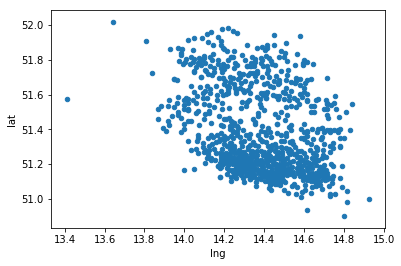

In [26]:
merged.plot(kind="scatter", x="lng", y="lat")

In [27]:
# merged["Prozent Sorbisch"].astype(float) # ValueError: could not convert string to float: 'kleiner Anteil'

In [28]:
merged[merged["Prozent Sorbisch"] == 'kleiner Anteil']

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng
10,15,Bischdorf,Bischdorf,NaN,NaN,"51.092749, 14.738737",13,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.092749,14.738737
11,16,Biskopicy,Bischofswerda,Q81717,2948267.0,"51.12771, 14.17974",86,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.127710,14.179740
28,35,Brěznja,Wiesa,Q160415,NaN,"51.255, 14.118333",6,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.255000,14.118333
56,67,Dažink,Kleindehsa,Q1746390,NaN,"51.105556, 14.595833",13,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.105556,14.595833
72,85,Dołhaćicy,Dolgowitz,Q161024,NaN,"51.114722, 14.739722",3,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.114722,14.739722
80,94,Suche Hendrichecy,Dürrhennersdorf,Q502520,2934324.0,"51.04863, 14.60383",5,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.048630,14.603830
85,101,Hrabowa,Großgrabe,Q160454,NaN,"51.333333, 14.016667",2,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.333333,14.016667
87,104,Habrachćicy,Ebersbach,Q157480,2933965.0,"51.008333, 14.583333",24,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.008333,14.583333
89,106,Halštrow,Elstra,Q81735,2930672.0,"51.22172, 14.13201",15,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.221720,14.132010
93,113,Ochranow,Herrnhut,Q165140,2905643.0,"51.016667, 14.733333",26,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.016667,14.733333


In [29]:
merged.loc[merged["Prozent Sorbisch"] == 'kleiner Anteil', "Prozent Sorbisch"] = "5.0"

In [30]:
merged[merged["Prozent Sorbisch"] == 'kleiner Anteil']

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng


In [31]:
merged["sorbian"] = merged["Prozent Sorbisch"].astype(float) / 100

In [32]:
merged.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng,sorbian
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.64151,97.3585,51.295750,14.094800,0.026415
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.5642,18.4358,51.233056,14.318889,0.815642
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.262,18.738,51.224722,14.592222,0.812620
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.8764,1.1236,51.223150,14.300620,0.988764
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.7931,11.2069,51.199444,14.296389,0.887931


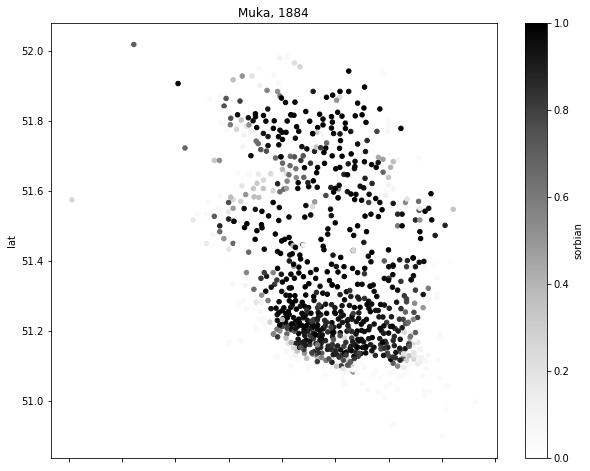

In [33]:
merged.plot(kind="scatter", x="lng", y="lat", c="sorbian", figsize=(10, 8), title="Muka, 1884")